# Multiphase Data Validation

Since data cleanliness is important to our analyses, we'd like to make sure whether the flags our data validation code has raised can safely be ignored.

I'll be sending a list of files that raise errors tomorrow.

## Case 1: Slice Thickness of the Last Slice is Different

This is the most common case. Can we just ignore this issue?

In [1]:
import pydicom
import numpy as np
from matplotlib import pyplot as plt

file275 slice thickness:  0.625000
file275 shape:  512 512


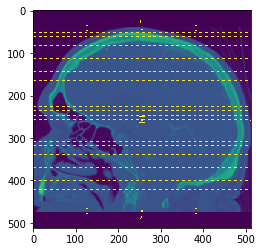

In [2]:
file275 = pydicom.read_file('CT.1.2.840.113619.2.5.168051714.16610.1502967857.275')
print('file275 slice thickness: ', file275.SliceThickness)
print('file275 shape: ', file275.Rows, file275.Columns)
arr275 = np.frombuffer(file275.pixel_array, np.int16).reshape(file275.Rows, file275.Columns)
plt.imshow(arr275) # Also what are the lines?

file275 slice thickness:  23.999998
file275 shape:  512 512


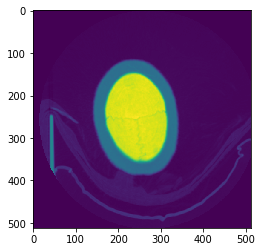

In [3]:
file318 = pydicom.read_file('CT.1.2.840.113619.2.5.168051714.16610.1502967857.318')
print('file275 slice thickness: ', file318.SliceThickness)
print('file275 shape: ', file318.Rows, file318.Columns)
arr318 = np.frombuffer(file318.pixel_array, np.int16).reshape(file318.Rows, file318.Columns)
plt.imshow(arr318)

## Case 2: Slices have Different Shape
Example N105/, some slices have row length 601 and other has row length 610

In [4]:
from dags.elvo.prepare_arrays import load_scan, preprocess_scan

In [11]:
slices = load_scan('N105/mip2/')
for i in range(len(slices)):
    print('slice', i, 'shape:', slices[i].Rows, slices[i].Columns)

slice 0 shape: 610 512
slice 1 shape: 610 512
slice 2 shape: 601 512
slice 3 shape: 610 512
slice 4 shape: 601 512
slice 5 shape: 610 512
slice 6 shape: 601 512
slice 7 shape: 610 512
slice 8 shape: 601 512
slice 9 shape: 610 512
slice 10 shape: 601 512
slice 11 shape: 610 512
slice 12 shape: 601 512
slice 13 shape: 610 512
slice 14 shape: 601 512
slice 15 shape: 610 512
slice 16 shape: 601 512
slice 17 shape: 610 512
slice 18 shape: 601 512
slice 19 shape: 610 512
slice 20 shape: 601 512
slice 21 shape: 610 512
slice 22 shape: 601 512
slice 23 shape: 610 512
slice 24 shape: 601 512
slice 25 shape: 610 512
slice 26 shape: 601 512
slice 27 shape: 610 512
slice 28 shape: 601 512
slice 29 shape: 610 512
slice 30 shape: 601 512
slice 31 shape: 610 512
slice 32 shape: 601 512
slice 33 shape: 610 512
slice 34 shape: 601 512
slice 35 shape: 610 512
slice 36 shape: 601 512
slice 37 shape: 610 512
slice 38 shape: 601 512
slice 39 shape: 610 512
slice 40 shape: 601 512
slice 41 shape: 610 512
sl

In [15]:
for i in range(len(slices)):
    print('slice', i, 'pixel_array', slices[i].pixel_array.shape)

slice 0 pixel_array (610, 512)
slice 1 pixel_array (610, 512)
slice 2 pixel_array (601, 512)
slice 3 pixel_array (610, 512)
slice 4 pixel_array (601, 512)
slice 5 pixel_array (610, 512)
slice 6 pixel_array (601, 512)
slice 7 pixel_array (610, 512)
slice 8 pixel_array (601, 512)
slice 9 pixel_array (610, 512)
slice 10 pixel_array (601, 512)
slice 11 pixel_array (610, 512)
slice 12 pixel_array (601, 512)
slice 13 pixel_array (610, 512)
slice 14 pixel_array (601, 512)
slice 15 pixel_array (610, 512)
slice 16 pixel_array (601, 512)
slice 17 pixel_array (610, 512)
slice 18 pixel_array (601, 512)
slice 19 pixel_array (610, 512)
slice 20 pixel_array (601, 512)
slice 21 pixel_array (610, 512)
slice 22 pixel_array (601, 512)
slice 23 pixel_array (610, 512)
slice 24 pixel_array (601, 512)
slice 25 pixel_array (610, 512)
slice 26 pixel_array (601, 512)
slice 27 pixel_array (610, 512)
slice 28 pixel_array (601, 512)
slice 29 pixel_array (610, 512)
slice 30 pixel_array (601, 512)
slice 31 pixel_arr

## Case 3: Bad Dicom Header
We can't use the pydicom module because it detects a bad header. THis file is bad: 'CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047847'

In [27]:
import os
for filename in os.listdir('N116/mip2/'):
    print(filename)
    pydicom.read_file('N116/mip2/' + filename)

CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047870
CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047884
CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047848
CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047883
CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047877
CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047879
CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047846
CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047878
CT.1.3.12.2.1107.5.1.4.66457.30000017071911361009200047847


InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.

I'll send a list of files that raise issues tomorrow.